# **ds4bio mlb: Introductory Machine Learning (Part b)**  
### *Data Science for Biology*  
**Notebook developed by Tejasvi Kalakota, Amber Jiang**  
*Supervised by Steven E. Brenner*  

Adapted from work by:  
Phillip Compeau, Kinsey Long, Max Staller, Jonathan Fischer, and Sarp Dora Kurtoglu

---

### **Learning Outcomes**

In this notebook, you will learn about:
- Supervised machine learning  
- Training and testing data  
- K-Nearest Neighbors (KNN) classifiers  
- Evaluating classification models  
- Using `sklearn` (scikit-learn)
  
### Helpful Data Science Resources
Here are some resources you can check out while doing this notebook!
- [Introductory documentation for pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [sklearn documentation](https://scikit-learn.org/stable/)

### Peer Consulting
If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.
Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.


In [35]:
from datascience import *
import numpy as np
import seaborn as sns
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

## Supervised Classification Models
Previously we used unsupervised learning deals which deals with unlabeled data, where the algorithm aims to identify patterns, relationships, or groupings within the dataset without predefined output labels. In supervised learning, the algorithm is trained on a labeled dataset, where each input is associated with a corresponding output. The model learns to map inputs to outputs, allowing it to make predictions on new, unseen data. 

Classification methods are a component of supervised machine learning as they provide a framework for organizing and categorizing data into distinct classes or groups. The need for classification arises from the vast amount of information available in different domains, such as image recognition, spam detection, medical diagnosis, and financial fraud detection. By employing classification algorithms, machines can effectively assign new, unseen data points to predefined categories, facilitating decision-making processes and automating tasks that would be impractical or time-consuming for humans to perform manually.In this assignment, we will be looking at K-Nearest Neighbors <br>

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors is frequently used to solve classification and regression problems. Since we are not predicting a continuous numeric variable, we will be exclusively focusing on predicting class with this algorithm.

KNN works by calculating the [Euclidean distance](https://builtin.com/articles/euclidean-distance) between the data prediction point and all the remaining points in the dataset. In this way, KNN involves making predictions based on the entire dataset rather than exclusively focusing on a specific learning model. In more technical terms, we would say it is a **"non-parametric"** or **"instance-based"** learning algorithm.

## Preparing Data for *scikit-learn*’s **K-Nearest Neighbors**

The model will use **features** to predict a **species**.  
To work with `scikit-learn`’s KNN implementation, set up your data as follows:

1. **Encode the class label**  
   *Represent each species with a numeric code (e.g., 0, 1, 2) instead of its name.*

2. **Separate predictors from the label**  
   *Place all feature columns in one array while keeping the class (species) column separate.*

3. **Create training and test splits**  
   *Split **both** the feature matrix and the class vector into training and test subsets.*

After these steps you will have **four** variables:

- `class_train`  
- `feature_train`  
- `class_test`  
- `feature_test`


In [36]:
# JUST RUN THIS CELL :)
data_dir = "data/iris.csv"

#import data and drop first column with redundant row numbers
iris = pd.read_csv(data_dir, header=0).drop("Unnamed: 0", axis=1)

iris.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<font color = #d14d0f>**QUESTION 3A**:</font> Since we know how our data looks like, let's reorganize our iris data table to get ready for implementing our classification model. To do this we need to have numbers for each species rather than names. First, create a dictionary that we call **species** and assign a different number to each of the species names. In this step we are encoding each of our species with a numeric code. 

In [37]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [38]:
# YOUR CODE HERE
# Make sure the names of the species are the exact same with the data table.
species = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

<font color = #d14d0f>**QUESTION 3B**:</font> Now, add a column, called **Species number**, to the iris dataset. Use the dictionary you just created to add the numbers corresponding to each species.

In [39]:
# YOUR CODE HERE
iris["Species number"] = iris["Species"].map(species)
iris.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Species,Species number
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


We need to set up the data for making predictions, with one variable having the features to be used in the classification, and another variable having (in the same order) the classification. Classes should be the species numbers, which tell us which species a flower is. Features will have have all the features but no other data. Just run the cell below

In [40]:
# JUST RUN THIS CEL :)
# For features, you can drop the column(s) that you don't need
features = iris.drop(["Species", "Species number", "Sepal width", "Petal width"], axis=1)
classes = iris["Species number"]
print(features)
print(classes)

     Sepal length  Petal length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species number, Length: 150, dtype: int64


<font color = #d14d0f>**QUESTION 3C**:</font> One of the key components of model building is splitting our data into training and test sets. We use the training set to construct our model and then evaluate its performance on the test set. There are many ways to split into training and test sets, but our data are amenable to doing so in the most straightforward fashion. Fortunately, there's a scikit-learn function called train_test_split that will do everything for us. 

Set your paramters here to 75% training and 25% test, but note you can alter these paramters in the future on your own models. It is generally good practice to shuffle your data prior to the split, to prevent order-related biases and ensure that both subsets are representative of the overall dataset. Train_test_split in scikit-learn shuffles the data by default. Here we used a fixed random state to have a deterministic result for evaluating student work.

Now, use ***train_test_split()*** to train-test split the data:

In [41]:
# YOUR CODE HERE
feature_train, feature_test, class_train, class_test = train_test_split(features, classes, test_size=0.25, random_state=42)

<font color = #d14d0f>**QUESTION 3D**:</font> It's good practice to check the shape of your train and test sets after splitting to make sure the data was divided correctly and that all sets have the expected dimensions. This quick check helps confirm that nothing went wrong during the split and that your features and labels are properly aligned before training a model. Display the shape of your test and train data. 

In [42]:
# JUST RUN THIS CELL :)
print("feature_train", feature_train.shape)
print("feature_test", feature_test.shape)
print("class_train", class_train.shape)
print("class_test", class_test.shape)

feature_train (112, 2)
feature_test (38, 2)
class_train (112,)
class_test (38,)


<font color = #d14d0f>**QUESTION 3E**:</font> We are ready to initiate our model. Set up the ***KNeighborClassifier*** into the variable ***knn***. Initiate k (n_neighbors) with 1. Next, fit the model on the training data (feature_train and class_train):

In [43]:
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(feature_train, class_train)

KNeighborsClassifier(n_neighbors=1)

<font color = #d14d0f>**QUESTION 3F**:</font> 

Now that you've trained your KNN model on the training data, it's time to test how well it performs on the test set.

Use the `.predict()` method to generate predictions for the test features (`feature_test`) and store the results in a variable called `class_pred`.

After that, display `class_pred` to see the predicted class labels for your test data.

In [44]:
# YOUR CODE HERE
class_pred= knn.predict(feature_test)
class_pred

array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

<font color = #d14d0f>**QUESTION 3G**:</font>

Now, let's check how well our model performs on the test data.

The **Mean Squared Error (MSE)** measures the average squared difference between the predicted and actual values. A lower MSE suggests better predictive performance. It's especially useful for understanding the scale of prediction error.

- Use Scikit-learn's `mean_squared_error` function to calculate the MSE between `class_test` and `class_pred`.
- Then, determine the **accuracy** of your predictions.

**Hint:** Use `knn.score()` to calculate accuracy.


In [45]:
# YOUR CODE HERE
mse = mean_squared_error(class_test, class_pred)
print(f"mse: {mse}")
knn.score(feature_test, class_test)

mse: 0.10526315789473684


0.8947368421052632

***ANSWER:*** The mean squared error is 0.105 whereas the accuracy score for our K-nearest neighbours are is 0.8947

### Choosing the Right k
In K-Nearest Neighbors, k is the number of closest data points the algorithm looks at to make a prediction. It is essentially a number that tells the algorithm how many nearby data points to consider when making a prediction. For example, if k = 3, the algorithm looks at the 3 closest data points to the new point and predicts the class that appears most often among those 3 neighbors. So, k controls how many neighbors influence the prediction.

Choosing k in k-Nearest Neighbors is about finding a balance between overfitting and underfitting. A small k can make the model too sensitive to noise, while a large k can make it too general. The best k is usually found by testing several values.

<font color = #d14d0f>**QUESTION 3H**:</font>
Then, determine the accuracy of your predictions using `knn.score()`, which gives the **multiclass classification accuracy** measurement:  [Accuracy and precision (Wikipedia)](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_multiclass_classification) Different `k` values will produce different models with different accuracy scores. Let’s try to find the **most optimal `k` value** with the highest accuracy for our dataset. We will explore potential `k` values from **1 to 20**. Create a `for` loop that iterates through `k` values from 1 to 20 and repeat all steps of implementing the k-nearest neighbors algorithm for each `k`. Calculate and record the accuracy score for each value of `k`.


In [46]:
# YOUR CODE HERE
accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature_train, class_train)
    class_pred = knn.predict(feature_test)
    accuracy = knn.score(feature_test, class_test)
    accuracy_scores.append(accuracy)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

k = 1, Accuracy = 0.8947
k = 2, Accuracy = 0.9211
k = 3, Accuracy = 0.9737
k = 4, Accuracy = 0.9737
k = 5, Accuracy = 0.9737
k = 6, Accuracy = 0.9737
k = 7, Accuracy = 0.9737
k = 8, Accuracy = 0.9474
k = 9, Accuracy = 1.0000
k = 10, Accuracy = 1.0000
k = 11, Accuracy = 1.0000
k = 12, Accuracy = 1.0000
k = 13, Accuracy = 1.0000
k = 14, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 16, Accuracy = 1.0000
k = 17, Accuracy = 1.0000
k = 18, Accuracy = 1.0000
k = 19, Accuracy = 0.9737
k = 20, Accuracy = 1.0000


***ANSWER*** Double click to enter your answer.

<font color = #d14d0f>**QUESTION 3I**:</font>
Proceed to select a k value that achieves the balance between bias and variance discussed earlier. Then, create and train your k-NN model using that value, and store the result in the variable ***knn_best***. After training, use the model to make predictions on your test set and store those predictions in the variable class_pred.

In [47]:
# YOUR CODE HERE
knn_best = KNeighborsClassifier(n_neighbors=9)
knn_best.fit(feature_train, class_train)
class_pred= knn_best.predict(feature_test)
class_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

### Precision and Recall

Precision and recall are two important metrics used to evaluate the performance of a classification model.

- **Precision** measures how many of the predicted positive cases were actually correct, focusing on the model’s positive predictions.
- **Recall**, on the other hand, measures how many of the actual positive cases were successfully identified by the model, focusing on its ability to capture all relevant instances.

#### Formulas:

- **Precision** = TP / (TP + FP)  
  (True Positives divided by the sum of True Positives and False Positives)

- **Recall** = TP / (TP + FN)  
  (True Positives divided by the sum of True Positives and False Negatives)

<font color = #d14d0f>**QUESTION 3J**:</font>
We will now evaluate how well it performs across the three Iris species.
- Generate a **classification report** and a **confusion matrix** using your test predictions (`class_pred`) and the true labels (`class_test`).
- Use `classification_report()` and `confusion_matrix()` from `sklearn.metrics` to do this.
-  **Note:**  The classification report uses a metric called **F1**.  The F1 score is the **harmonic mean** of precision and recall, providing a single value that summarizes both by considering them symmetrically. Learn more here: [F1 Score (Wikipedia)](https://en.wikipedia.org/wiki/F-score). All metrics have limitations.  F1 can be particularly inappropriate for many problems in biology where datasets are **unbalanced** or where **high specificity** is required.  However, for this application, it is a reasonable metric to use.
  
Assess the results of the matrix and report. In your stament address the following
- What the classfication report tells us about what does the tell you about the model's precision, recall, and F1-score for each of the three Iris species? Don't just cite values. Explain what this means 
- Are there any species the model struggles to classify accurately? What might explain this?
- What patterns do you observe in the **confusion matrix**? Are there particular species that are often confused with one another?
- Based on these results, would you consider this model reliable for distinguishing between all three Iris species? Why or why not?


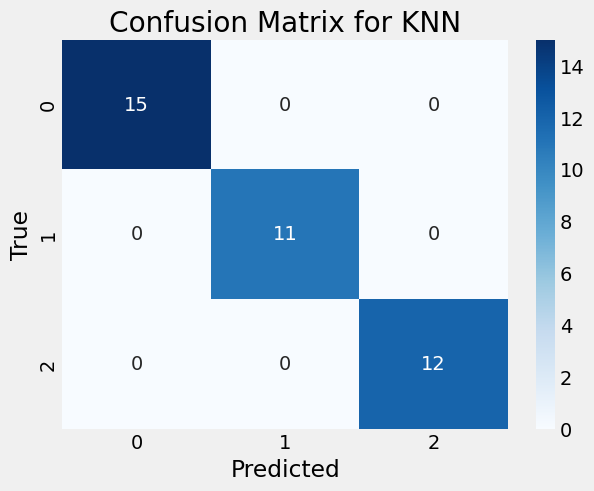

In [48]:
# YOUR CODE HERE

cm = confusion_matrix(y_true=class_test, y_pred=class_pred, labels=knn_best.classes_)

# Plot heatmap
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

In [49]:
# Print classification report
print(classification_report(class_test, class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



***ANSWER:*** with `n_neighbors=9` our classification report details the following:

1. The precision score is perfectly 1 which indicates that all positive predictions are accurate with no errors

2. We also achieved a recall of 1.0 means that the model has zero false negatives so this implies a 100% detection rate

3. Our model also achieves a perfect f1-score of 1 which essentially means that the model accurately predicts all positive cases and avoids misclassifying any negative cases as positive

For the other points, it doesn't look like the model is struggling to classify any of the species accurately. Hence I believe this model works well for distinguishing between flower species